# Evaluation of Experiments


This will begin with testing the experiments run on the Cartpole environments then the Inverted Double Cartpole the  finally the Bipedal Walker by performing statistical tests on the 

In [49]:
!pip install Optuna
!pip install stable-baselines3
!pip install Gymnasium
!pip install Numpy
!pip install Tensorflow
!pip install pandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pickle as pkl
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances
from tensorboard.backend.event_processing import event_accumulator

In [10]:
# Functions used Throughout

def read_rewards(trial_name):
    logdir = os.path.join(base_log_dir, trial_name)
    acc = event_accumulator.EventAccumulator(logdir)
    acc.Reload()
    stats = acc.scalars.Items("rollout/ep_rew_mean")
    reward_values = {x.step:x.value for x in stats}
    return reward_values

def data_to_dataframe(rewards, trial_name):
    rewards_df = pd.DataFrame(list(rewards.items()), columns=['step', 'reward'])
    rewards_df['trial'] = trial_name
    return rewards_df

## CustomCartpole-v0
Reward function updated to be based on the angle of the pole <br>
Reward = 1 - abs(current_pole_angle/max_pole_angle_before_termination)

#### Data Collection

In [50]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_ccp_v0 = pkl.load(open("constant_lr_CustomCartpole-v0.pkl", "rb"))
lin_ccp_v0 = pkl.load(open("linear_lr_CustomCartpole-v0.pkl", "rb"))
exp_ccp_v0 = pkl.load(open("exponential_lr_CustomCartpole-v0.pkl", "rb"))
adap_ccp_v0 = pkl.load(open("adaptive_lr_CustomCartpole-v0.pkl", "rb"))
adapt_ccp_v0 = pkl.load(open("adaptive_t_lr_CustomCartpole-v0.pkl", "rb"))

In [51]:
print("-----Constant LR-----")
print("Best Trial run:", cons_ccp_v0.best_trial.number)
print("Best Trial Hyperparameters:", cons_ccp_v0.best_trial.params)
print("Best Trial Value:", cons_ccp_v0.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_ccp_v0.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_ccp_v0.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_ccp_v0.best_trial.number)
print("Best Trial Hyperparameters:", lin_ccp_v0.best_trial.params)
print("Best Trial Value:", lin_ccp_v0.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_ccp_v0.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_ccp_v0.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_ccp_v0.best_trial.number)
print("Best Trial Hyperparameters:", exp_ccp_v0.best_trial.params)
print("Best Trial Value:", exp_ccp_v0.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_ccp_v0.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_ccp_v0.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_ccp_v0.best_trial.number)
print("Best Trial Hyperparameters:", adap_ccp_v0.best_trial.params)
print("Best Trial Value:", adap_ccp_v0.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_ccp_v0.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_ccp_v0.trials))

print("\n-----Adaptive (threshold) LR-----")
print("Best Trial run:", adapt_ccp_v0.best_trial.number)
print("Best Trial Hyperparameters:", adapt_ccp_v0.best_trial.params)
print("Best Trial Value:", adapt_ccp_v0.best_trial.values)

adapt_evaluated_rewards = 0
for trial in adapt_ccp_v0.trials:
    adapt_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adapt_ccp_v0.trials))

-----Constant LR-----
Best Trial run: 0
Best Trial Hyperparameters: {'learning_rate': 0.000919477729627226}
Best Trial Value: [500.57582956552505]
Average Evaluated Reward After Training: 434.88383877520766

-----Linear Schedule LR-----
Best Trial run: 6
Best Trial Hyperparameters: {'initial_lr': 0.00028525393979861503, 'final_lr': 5.227084157502376e-06}
Best Trial Value: [500.69800169467925]
Average Evaluated Reward After Training: 381.8262014756018

-----Exponential Schedule LR-----
Best Trial run: 1
Best Trial Hyperparameters: {'initial_lr': 0.00034937810987854264, 'final_lr': 4.722449993514159e-06, 'decay_rate': 0.10960428354506246}
Best Trial Value: [500.67050631046294]
Average Evaluated Reward After Training: 419.5604665867487

-----Adaptive (no threshold) LR-----
Best Trial run: 4
Best Trial Hyperparameters: {'initial_lr': 0.00048525610847425116, 'top_lr': 0.001628126644998413, 'bottom_lr': 0.0002355214999941015, 'adjustment_factor': 0.08609999787042508}
Best Trial Value: [500.6

We can see that the Adpative learning rates using both a threshold for the metric and without the threshold have the same values, this is consistant for all the environements on which both were run. <br>
We scrap the idea of testing the Hypothesis that an adaptive learning rate using a threshold on the performance metric is better than one that does not use a threshold.

In [52]:
fig1 = plot_optimization_history(cons_ccp_v0)
fig2 = plot_optimization_history(lin_ccp_v0)
fig3 = plot_optimization_history(exp_ccp_v0)
fig4 = plot_optimization_history(adap_ccp_v0)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [53]:
fig1 = plot_param_importances(cons_ccp_v0) # will only be learning rate, pointless
fig2 = plot_param_importances(lin_ccp_v0) # initial learning rate essentially only one that mattered
fig3 = plot_param_importances(exp_ccp_v0) # final lr most important, decay rate slightly less, and initial lr not really important
fig4 = plot_param_importances(adap_ccp_v0) # adjustment factor more important than initial lr

#fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [54]:
fig1 = plot_parallel_coordinate(cons_ccp_v0) # will only be learning rate, pointless
fig2 = plot_parallel_coordinate(lin_ccp_v0)
fig3 = plot_parallel_coordinate(exp_ccp_v0)
fig4 = plot_parallel_coordinate(adap_ccp_v0)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

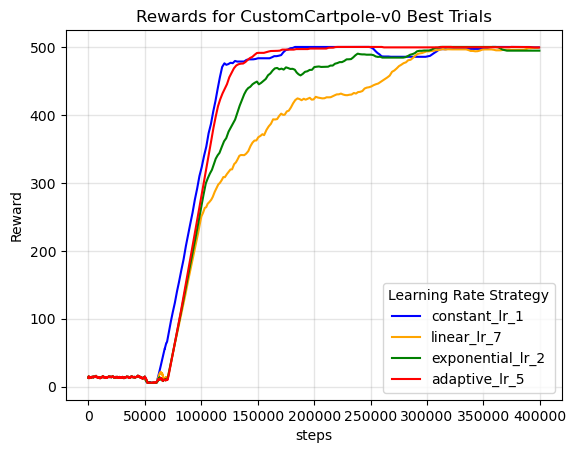

In [55]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/CustomCartPole-v0"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_1", "linear_lr_7", "exponential_lr_2", "adaptive_lr_5"]

colours = {
    "constant_lr_1": "blue",
    "linear_lr_7": "orange",
    "exponential_lr_2": "green",
    "adaptive_lr_5": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for CustomCartpole-v0 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

Constant converges fastest to optimal policy along with adaptive, linear and exponential noticeably slow down after 100000 time steps. <br>
The adaptive strategy seems to reach the highest reward first, indicating it might be adapting well to the environment. <br>
After roughly 320,000 time steps they have all converged.


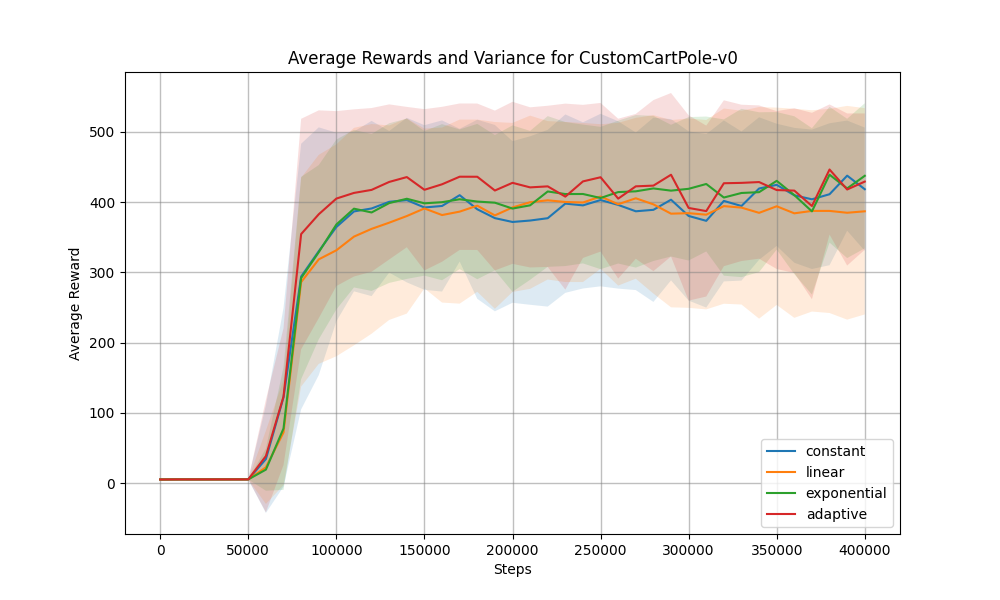

Average rewards generated from plots.py <br>
All initially improve rapidly, suggesting early learning progress is quick. <br>
Can see that the variation of rewards is quite equal throughout the learning process. <br>
Adaptive learning rate seems to learn the most efficiently and then maintains its performance, however after 350,000 times steps they all perform similarly

## CustomCartpole-v1
length of the pole increases overtime from 0.3 to 0.8

In [44]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_ccp_v1 = pkl.load(open("constant_lr_CustomCartpole-v1.pkl", "rb"))
lin_ccp_v1 = pkl.load(open("linear_lr_CustomCartpole-v1.pkl", "rb"))
exp_ccp_v1 = pkl.load(open("exponential_lr_CustomCartpole-v1.pkl", "rb"))
adap_ccp_v1 = pkl.load(open("adaptive_lr_CustomCartpole-v1.pkl", "rb"))
adapt_ccp_v1 = pkl.load(open("adaptive_t_lr_CustomCartpole-v1.pkl", "rb"))

In [45]:
print("-----Constant LR-----")
print("Best Trial run:", cons_ccp_v1.best_trial.number)
print("Best Trial Hyperparameters:", cons_ccp_v1.best_trial.params)
print("Best Trial Value:", cons_ccp_v1.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_ccp_v1.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_ccp_v1.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_ccp_v1.best_trial.number)
print("Best Trial Hyperparameters:", lin_ccp_v1.best_trial.params)
print("Best Trial Value:", lin_ccp_v1.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_ccp_v1.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_ccp_v1.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_ccp_v1.best_trial.number)
print("Best Trial Hyperparameters:", exp_ccp_v1.best_trial.params)
print("Best Trial Value:", exp_ccp_v1.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_ccp_v1.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_ccp_v1.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_ccp_v1.best_trial.number)
print("Best Trial Hyperparameters:", adap_ccp_v1.best_trial.params)
print("Best Trial Value:", adap_ccp_v1.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_ccp_v1.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_ccp_v1.trials))

-----Constant LR-----
Best Trial run: 11
Best Trial Hyperparameters: {'learning_rate': 0.0022140519598481583}
Best Trial Value: [500.57829480171205]
Average Evaluated Reward After Training: 417.1804125563707

-----Linear Schedule LR-----
Best Trial run: 12
Best Trial Hyperparameters: {'initial_lr': 0.00232069265437802, 'final_lr': 1.0025616212941211e-06}
Best Trial Value: [500.70143513083457]
Average Evaluated Reward After Training: 439.6010094446735

-----Exponential Schedule LR-----
Best Trial run: 7
Best Trial Hyperparameters: {'initial_lr': 0.00032289397406480043, 'final_lr': 2.8366888435117152e-06, 'decay_rate': 0.23469223941343204}
Best Trial Value: [500.61276919841765]
Average Evaluated Reward After Training: 430.2245774606616

-----Adaptive (no threshold) LR-----
Best Trial run: 7
Best Trial Hyperparameters: {'initial_lr': 0.0027526504617687462, 'top_lr': 0.016199846267914132, 'bottom_lr': 0.0008263223501791057, 'adjustment_factor': 0.03444228901647376}
Best Trial Value: [500.6

In [46]:
fig1 = plot_optimization_history(cons_ccp_v1)
fig2 = plot_optimization_history(lin_ccp_v1)
fig3 = plot_optimization_history(exp_ccp_v1)
fig4 = plot_optimization_history(adap_ccp_v1)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [47]:
fig1 = plot_param_importances(cons_ccp_v1)
fig2 = plot_param_importances(lin_ccp_v1) 
fig3 = plot_param_importances(exp_ccp_v1) 
fig4 = plot_param_importances(adap_ccp_v1) 

#fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [65]:
fig1 = plot_parallel_coordinate(cons_ccp_v1) # will only be learning rate, pointless
fig2 = plot_parallel_coordinate(lin_ccp_v1)
fig3 = plot_parallel_coordinate(exp_ccp_v1)
fig4 = plot_parallel_coordinate(adap_ccp_v1)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [49]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/CustomCartPole-v1"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_1", "linear_lr_13", "exponential_lr_8", "adaptive_lr_8"]

colours = {
    "constant_lr_12": "blue",
    "linear_lr_13": "orange",
    "exponential_lr_8": "green",
    "adaptive_lr_8": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for CustomCartpole-v1 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

KeyError: 'constant_lr_1'

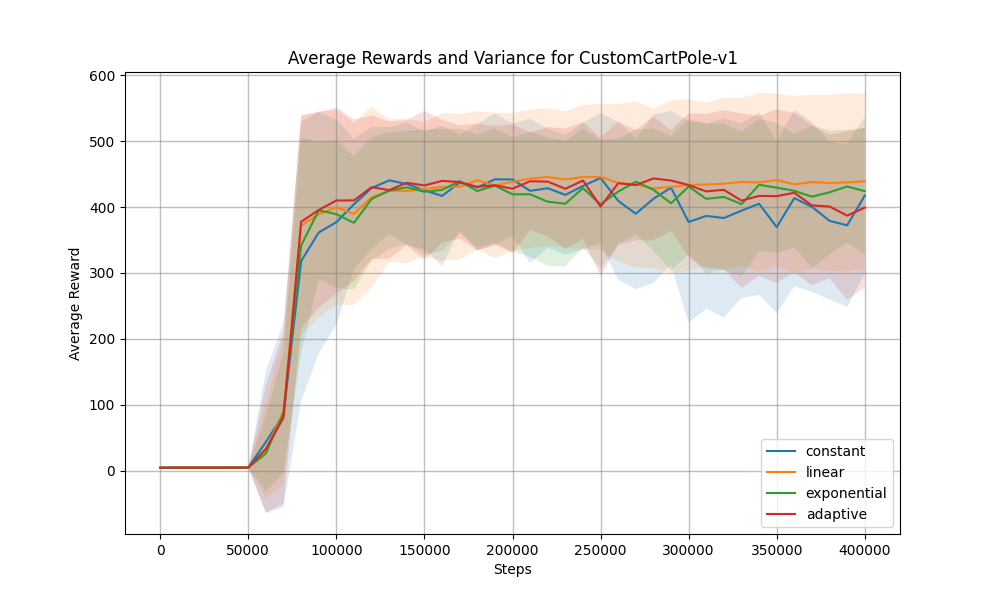

## CustomCartpole-v2
length of the pole is randomly selected to be between 0.3 to 0.8 with equal probability

In [59]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_ccp_v2 = pkl.load(open("constant_lr_CustomCartpole-v2.pkl", "rb"))
lin_ccp_v2 = pkl.load(open("linear_lr_CustomCartpole-v2.pkl", "rb"))
exp_ccp_v2 = pkl.load(open("exponential_lr_CustomCartpole-v2.pkl", "rb"))
adap_ccp_v2 = pkl.load(open("adaptive_lr_CustomCartpole-v2.pkl", "rb"))

In [60]:
print("-----Constant LR-----")
print("Best Trial run:", cons_ccp_v2.best_trial.number)
print("Best Trial Hyperparameters:", cons_ccp_v2.best_trial.params)
print("Best Trial Value:", cons_ccp_v2.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_ccp_v2.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_ccp_v2.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_ccp_v2.best_trial.number)
print("Best Trial Hyperparameters:", lin_ccp_v2.best_trial.params)
print("Best Trial Value:", lin_ccp_v2.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_ccp_v2.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_ccp_v2.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_ccp_v2.best_trial.number)
print("Best Trial Hyperparameters:", exp_ccp_v2.best_trial.params)
print("Best Trial Value:", exp_ccp_v2.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_ccp_v2.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_ccp_v2.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_ccp_v2.best_trial.number)
print("Best Trial Hyperparameters:", adap_ccp_v2.best_trial.params)
print("Best Trial Value:", adap_ccp_v2.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_ccp_v2.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_ccp_v2.trials))

-----Constant LR-----
Best Trial run: 12
Best Trial Hyperparameters: {'learning_rate': 0.00025321499091421557}
Best Trial Value: [500.63642466664317]
Average Evaluated Reward After Training: 347.2571439372601

-----Linear Schedule LR-----
Best Trial run: 13
Best Trial Hyperparameters: {'initial_lr': 0.0019971327801129703, 'final_lr': 5.937250573934578e-06}
Best Trial Value: [500.6776538252831]
Average Evaluated Reward After Training: 414.24941475874436

-----Exponential Schedule LR-----
Best Trial run: 10
Best Trial Hyperparameters: {'initial_lr': 0.0031647799195126647, 'final_lr': 1.002770186099567e-06, 'decay_rate': 0.9839843113020914}
Best Trial Value: [500.529473900795]
Average Evaluated Reward After Training: 413.8373049348593

-----Adaptive (no threshold) LR-----
Best Trial run: 14
Best Trial Hyperparameters: {'initial_lr': 0.0030281740595037524, 'top_lr': 0.022223192955615124, 'bottom_lr': 0.0012515490038795577, 'adjustment_factor': 0.0508677286145082}
Best Trial Value: [500.590

In [62]:
fig1 = plot_optimization_history(cons_ccp_v2)
fig2 = plot_optimization_history(lin_ccp_v2)
fig3 = plot_optimization_history(exp_ccp_v2)
fig4 = plot_optimization_history(adap_ccp_v2)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [66]:
fig1 = plot_param_importances(cons_ccp_v2)
fig2 = plot_param_importances(lin_ccp_v2) 
fig3 = plot_param_importances(exp_ccp_v2) 
fig4 = plot_param_importances(adap_ccp_v2) 

#fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [67]:
fig1 = plot_parallel_coordinate(cons_ccp_v2) # will only be learning rate, pointless
fig2 = plot_parallel_coordinate(lin_ccp_v2)
fig3 = plot_parallel_coordinate(exp_ccp_v2)
fig4 = plot_parallel_coordinate(adap_ccp_v2)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

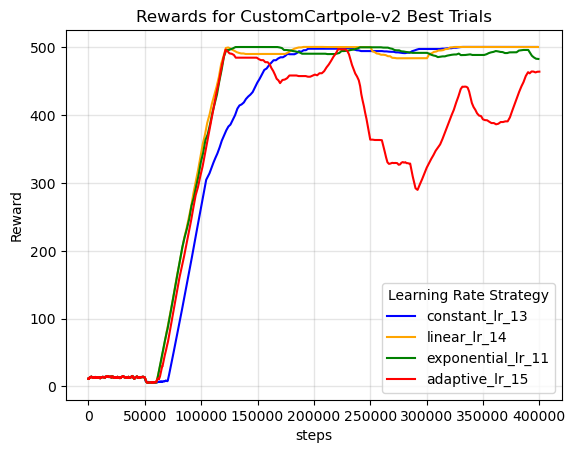

In [70]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/CustomCartPole-v2"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_13", "linear_lr_14", "exponential_lr_11", "adaptive_lr_15"]

colours = {
    "constant_lr_13": "blue",
    "linear_lr_14": "orange",
    "exponential_lr_11": "green",
    "adaptive_lr_15": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for CustomCartpole-v2 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

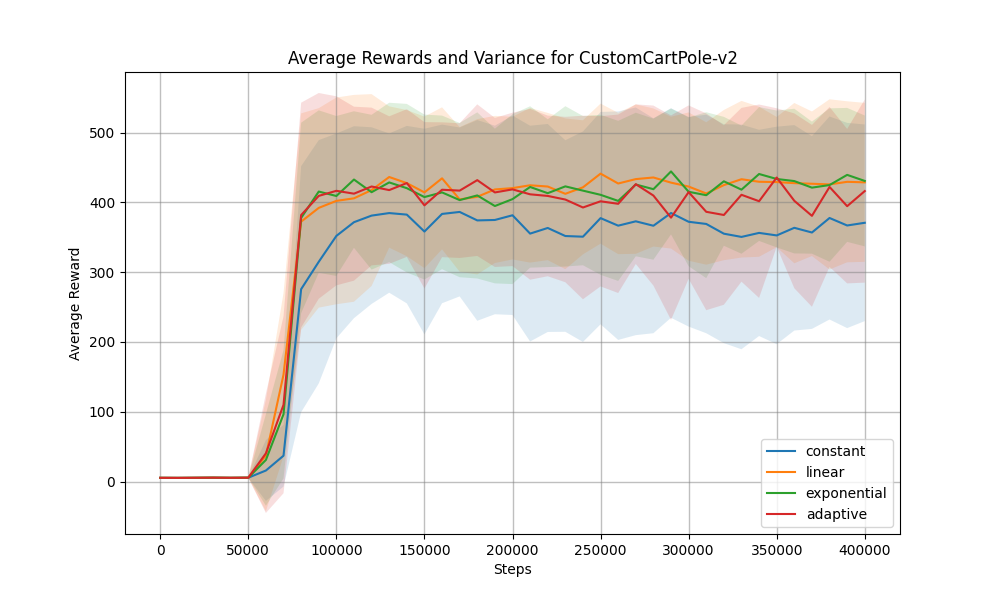

## CustomCartpole-v3
Mass of the cart increases as training progresses

In [85]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_ccp_v3 = pkl.load(open("constant_lr_CustomCartpole-v3.pkl", "rb"))
lin_ccp_v3 = pkl.load(open("linear_lr_CustomCartpole-v3.pkl", "rb"))
exp_ccp_v3 = pkl.load(open("exponential_lr_CustomCartpole-v3.pkl", "rb"))
adap_ccp_v3 = pkl.load(open("adaptive_lr_CustomCartpole-v3.pkl", "rb"))

In [86]:
print("-----Constant LR-----")
print("Best Trial run:", cons_ccp_v3.best_trial.number)
print("Best Trial Hyperparameters:", cons_ccp_v3.best_trial.params)
print("Best Trial Value:", cons_ccp_v3.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_ccp_v3.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_ccp_v3.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_ccp_v3.best_trial.number)
print("Best Trial Hyperparameters:", lin_ccp_v3.best_trial.params)
print("Best Trial Value:", lin_ccp_v3.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_ccp_v3.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_ccp_v3.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_ccp_v3.best_trial.number)
print("Best Trial Hyperparameters:", exp_ccp_v3.best_trial.params)
print("Best Trial Value:", exp_ccp_v3.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_ccp_v3.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_ccp_v3.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_ccp_v3.best_trial.number)
print("Best Trial Hyperparameters:", adap_ccp_v3.best_trial.params)
print("Best Trial Value:", adap_ccp_v3.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_ccp_v3.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_ccp_v3.trials))

-----Constant LR-----
Best Trial run: 0
Best Trial Hyperparameters: {'learning_rate': 0.000919477729627226}
Best Trial Value: [500.57582956552505]
Average Evaluated Reward After Training: 434.88383877520766

-----Linear Schedule LR-----
Best Trial run: 6
Best Trial Hyperparameters: {'initial_lr': 0.00028525393979861503, 'final_lr': 5.227084157502376e-06}
Best Trial Value: [500.69800169467925]
Average Evaluated Reward After Training: 381.8262014756018

-----Exponential Schedule LR-----
Best Trial run: 1
Best Trial Hyperparameters: {'initial_lr': 0.00034937810987854264, 'final_lr': 4.722449993514159e-06, 'decay_rate': 0.10960428354506246}
Best Trial Value: [500.67050631046294]
Average Evaluated Reward After Training: 419.5604665867487

-----Adaptive (no threshold) LR-----
Best Trial run: 4
Best Trial Hyperparameters: {'initial_lr': 0.00048525610847425116, 'top_lr': 0.001628126644998413, 'bottom_lr': 0.0002355214999941015, 'adjustment_factor': 0.08609999787042508}
Best Trial Value: [500.6

In [87]:
fig1 = plot_optimization_history(cons_ccp_v3)
fig2 = plot_optimization_history(lin_ccp_v3)
fig3 = plot_optimization_history(exp_ccp_v3)
fig4 = plot_optimization_history(adap_ccp_v3)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [88]:
fig1 = plot_param_importances(cons_ccp_v3)
fig2 = plot_param_importances(lin_ccp_v3) 
fig3 = plot_param_importances(exp_ccp_v3) 
fig4 = plot_param_importances(adap_ccp_v3) 

#fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [89]:
fig1 = plot_parallel_coordinate(cons_ccp_v3) # will only be learning rate, pointless
fig2 = plot_parallel_coordinate(lin_ccp_v3)
fig3 = plot_parallel_coordinate(exp_ccp_v3)
fig4 = plot_parallel_coordinate(adap_ccp_v3)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [90]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/CustomCartPole-v3"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_1", "linear_lr_7", "exponential_lr_2", "adaptive_lr_5"]

colours = {
    "constant_lr_13": "blue",
    "linear_lr_14": "orange",
    "exponential_lr_11": "green",
    "adaptive_lr_15": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for CustomCartpole-v3 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

KeyError: 'constant_lr_1'

## InvertedDoublePendulum-v4

In [91]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_idp_v4 = pkl.load(open("constant_lr_InvertedDoublePendulum-v4.pkl", "rb"))
lin_idp_v4 = pkl.load(open("linear_lr_InvertedDoublePendulum-v4.pkl", "rb"))
exp_idp_v4 = pkl.load(open("exponential_lr_InvertedDoublePendulum-v4.pkl", "rb"))
adap_idp_v4 = pkl.load(open("adaptive_lr_InvertedDoublePendulum-v4.pkl", "rb"))

In [92]:
print("-----Constant LR-----")
print("Best Trial run:", cons_idp_v4.best_trial.number)
print("Best Trial Hyperparameters:", cons_idp_v4.best_trial.params)
print("Best Trial Value:", cons_idp_v4.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_idp_v4.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_idp_v4.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_idp_v4.best_trial.number)
print("Best Trial Hyperparameters:", lin_idp_v4.best_trial.params)
print("Best Trial Value:", lin_idp_v4.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_idp_v4.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_idp_v4.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_idp_v4.best_trial.number)
print("Best Trial Hyperparameters:", exp_idp_v4.best_trial.params)
print("Best Trial Value:", exp_idp_v4.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_idp_v4.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_idp_v4.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_idp_v4.best_trial.number)
print("Best Trial Hyperparameters:", adap_idp_v4.best_trial.params)
print("Best Trial Value:", adap_idp_v4.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_idp_v4.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_idp_v4.trials))

-----Constant LR-----
Best Trial run: 10
Best Trial Hyperparameters: {'learning_rate': 0.00023769635376697087}
Best Trial Value: [9359.908057880402]
Average Evaluated Reward After Training: 4160.316704683303

-----Linear Schedule LR-----
Best Trial run: 7
Best Trial Hyperparameters: {'initial_lr': 0.0002847977806770251, 'final_lr': 7.225687492540896e-06}
Best Trial Value: [9359.820306491853]
Average Evaluated Reward After Training: 4897.54200562795

-----Exponential Schedule LR-----
Best Trial run: 9
Best Trial Hyperparameters: {'initial_lr': 0.00014908553159744597, 'final_lr': 1.951513726828748e-05, 'decay_rate': 0.6671887648637818}
Best Trial Value: [9359.841720199585]
Average Evaluated Reward After Training: 5576.150114990871

-----Adaptive (no threshold) LR-----
Best Trial run: 11
Best Trial Hyperparameters: {'initial_lr': 0.00014105488182991735, 'top_lr': 0.0002830745397116942, 'bottom_lr': 2.4324465094407018e-05, 'adjustment_factor': 0.05978250156202032}
Best Trial Value: [9359.8

In [94]:
fig1 = plot_optimization_history(cons_idp_v4)
fig2 = plot_optimization_history(lin_idp_v4)
fig3 = plot_optimization_history(exp_idp_v4)
fig4 = plot_optimization_history(adap_idp_v4)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [95]:
fig1 = plot_param_importances(cons_idp_v4)
fig2 = plot_param_importances(lin_idp_v4)
fig3 = plot_param_importances(exp_idp_v4)
fig4 = plot_param_importances(adap_idp_v4)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [96]:
fig1 = plot_parallel_coordinate(cons_idp_v4)
fig2 = plot_parallel_coordinate(lin_idp_v4)
fig3 = plot_parallel_coordinate(exp_idp_v4)
fig4 = plot_parallel_coordinate(adap_idp_v4)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

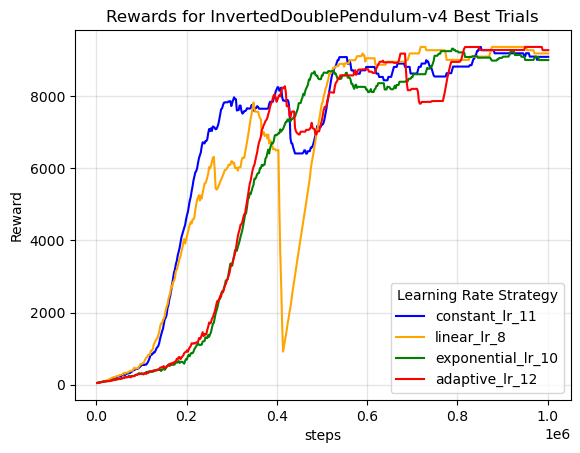

In [97]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/InvertedDoublePendulum-v4"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_11", "linear_lr_8", "exponential_lr_10", "adaptive_lr_12"]

colours = {
    "constant_lr_11": "blue",
    "linear_lr_8": "orange",
    "exponential_lr_10": "green",
    "adaptive_lr_12": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for InvertedDoublePendulum-v4 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

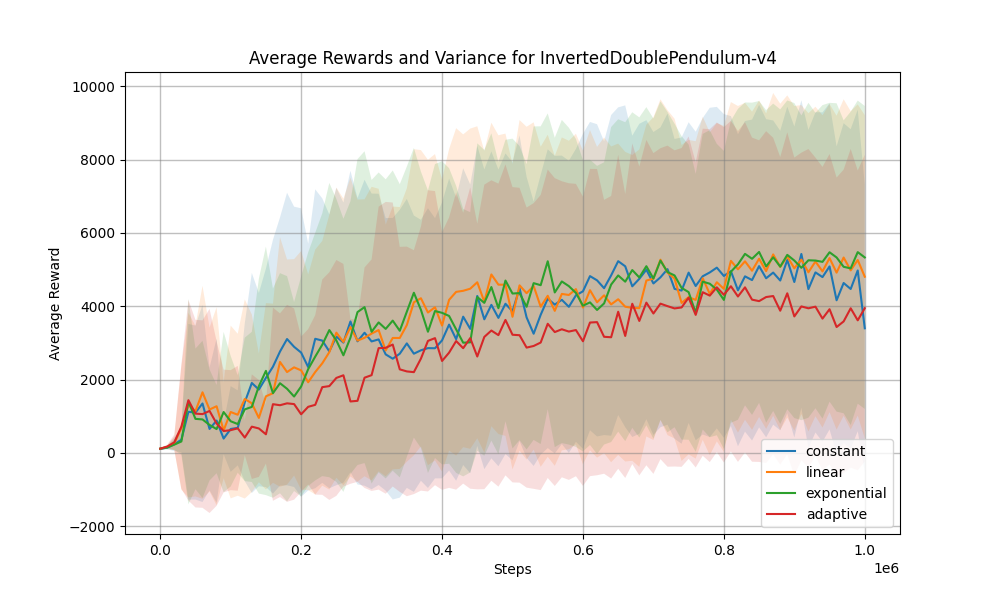

## CustomInvertedDoublePendulum-v0
Base pole increases as training progresses

In [98]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_cidp_v0 = pkl.load(open("constant_lr_CustomInvertedDoublePendulum-v0.pkl", "rb"))
lin_cidp_v0 = pkl.load(open("linear_lr_CustomInvertedDoublePendulum-v0.pkl", "rb"))
exp_cidp_v0 = pkl.load(open("exponential_lr_CustomInvertedDoublePendulum-v0.pkl", "rb"))
adap_cidp_v0 = pkl.load(open("adaptive_lr_CustomInvertedDoublePendulum-v0.pkl", "rb"))

In [106]:
print("-----Constant LR-----")
print("Best Trial run:", cons_cidp_v0.best_trial.number)
print("Best Trial Hyperparameters:", cons_cidp_v0.best_trial.params)
print("Best Trial Value:", cons_cidp_v0.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_cidp_v0.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_cidp_v0.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_cidp_v0.best_trial.number)
print("Best Trial Hyperparameters:", lin_cidp_v0.best_trial.params)
print("Best Trial Value:", lin_cidp_v0.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_cidp_v0.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_cidp_v0.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_cidp_v0.best_trial.number)
print("Best Trial Hyperparameters:", exp_cidp_v0.best_trial.params)
print("Best Trial Value:", exp_cidp_v0.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_cidp_v0.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_cidp_v0.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_cidp_v0.best_trial.number)
print("Best Trial Hyperparameters:", adap_cidp_v0.best_trial.params)
print("Best Trial Value:", adap_cidp_v0.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_cidp_v0.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_cidp_v0.trials))

-----Constant LR-----
Best Trial run: 8
Best Trial Hyperparameters: {'learning_rate': 4.1539901573562595e-05}
Best Trial Value: [9648.826424026489]
Average Evaluated Reward After Training: 4049.362506955464

-----Linear Schedule LR-----
Best Trial run: 1
Best Trial Hyperparameters: {'initial_lr': 0.0011188773887637101, 'final_lr': 9.807383359565505e-06}
Best Trial Value: [9877.840837478638]
Average Evaluated Reward After Training: 4494.5710383510595

-----Exponential Schedule LR-----
Best Trial run: 12
Best Trial Hyperparameters: {'initial_lr': 0.0001285571464029158, 'final_lr': 4.98659367968839e-06, 'decay_rate': 0.4877738144022304}
Best Trial Value: [9772.65011138916]
Average Evaluated Reward After Training: 3407.803524792989

-----Adaptive (no threshold) LR-----
Best Trial run: 6
Best Trial Hyperparameters: {'initial_lr': 0.00011342540460787548, 'top_lr': 0.00023559756470055678, 'bottom_lr': 3.328375054848501e-05, 'adjustment_factor': 0.01706493930024223}
Best Trial Value: [9974.603

In [100]:
fig1 = plot_optimization_history(cons_cidp_v0)
fig2 = plot_optimization_history(lin_cidp_v0)
fig3 = plot_optimization_history(exp_cidp_v0)
fig4 = plot_optimization_history(adap_cidp_v0)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [101]:
fig1 = plot_param_importances(cons_cidp_v0)
fig2 = plot_param_importances(lin_cidp_v0)
fig3 = plot_param_importances(exp_cidp_v0)
fig4 = plot_param_importances(adap_cidp_v0)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [102]:
fig1 = plot_parallel_coordinate(cons_cidp_v0)
fig2 = plot_parallel_coordinate(lin_cidp_v0)
fig3 = plot_parallel_coordinate(exp_cidp_v0)
fig4 = plot_parallel_coordinate(adap_cidp_v0)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

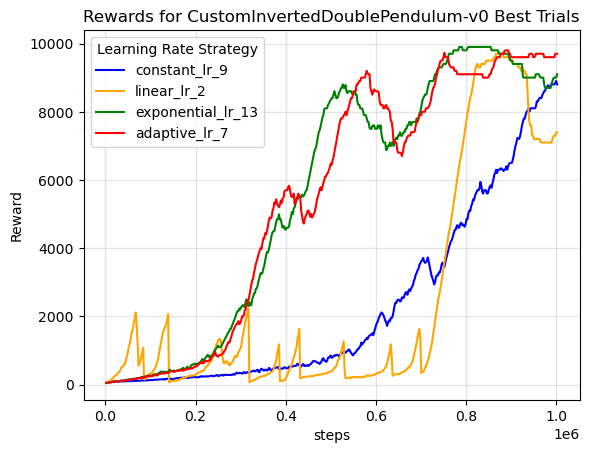

In [103]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/CustomInvertedDoublePendulum-v0"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_9", "linear_lr_2", "exponential_lr_13", "adaptive_lr_7"]

colours = {
    "constant_lr_9": "blue",
    "linear_lr_2": "orange",
    "exponential_lr_13": "green",
    "adaptive_lr_7": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for CustomInvertedDoublePendulum-v0 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

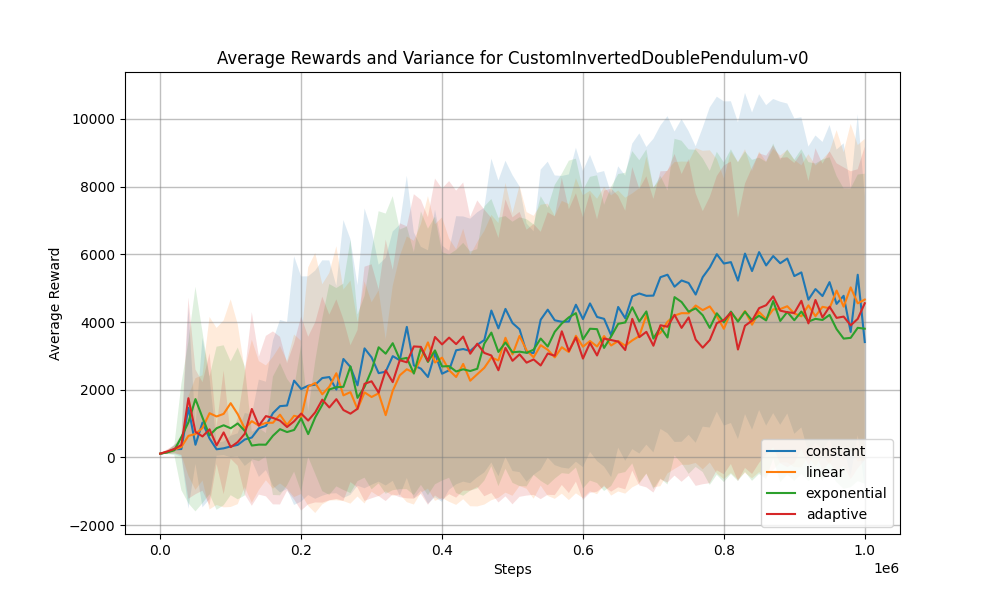

## CustomInvertedDoublePendulum-v1
Both pole lengths increases as training progresses

In [108]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_cidp_v1 = pkl.load(open("constant_lr_CustomInvertedDoublePendulum-v1.pkl", "rb"))
lin_cidp_v1 = pkl.load(open("linear_lr_CustomInvertedDoublePendulum-v1.pkl", "rb"))
exp_cidp_v1 = pkl.load(open("exponential_lr_CustomInvertedDoublePendulum-v1.pkl", "rb"))
adap_cidp_v1 = pkl.load(open("adaptive_lr_CustomInvertedDoublePendulum-v1.pkl", "rb"))

In [109]:
print("-----Constant LR-----")
print("Best Trial run:", cons_cidp_v1.best_trial.number)
print("Best Trial Hyperparameters:", cons_cidp_v1.best_trial.params)
print("Best Trial Value:", cons_cidp_v1.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_cidp_v1.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_cidp_v1.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_cidp_v1.best_trial.number)
print("Best Trial Hyperparameters:", lin_cidp_v1.best_trial.params)
print("Best Trial Value:", lin_cidp_v1.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_cidp_v1.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_cidp_v1.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_cidp_v1.best_trial.number)
print("Best Trial Hyperparameters:", exp_cidp_v1.best_trial.params)
print("Best Trial Value:", exp_cidp_v1.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_cidp_v1.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_cidp_v1.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_cidp_v1.best_trial.number)
print("Best Trial Hyperparameters:", adap_cidp_v1.best_trial.params)
print("Best Trial Value:", adap_cidp_v1.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_cidp_v1.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_cidp_v1.trials))

-----Constant LR-----
Best Trial run: 8
Best Trial Hyperparameters: {'learning_rate': 4.1539901573562595e-05}
Best Trial Value: [9648.826424026489]
Average Evaluated Reward After Training: 4049.362506955464

-----Linear Schedule LR-----
Best Trial run: 1
Best Trial Hyperparameters: {'initial_lr': 0.0011188773887637101, 'final_lr': 9.807383359565505e-06}
Best Trial Value: [9877.840837478638]
Average Evaluated Reward After Training: 4494.5710383510595

-----Exponential Schedule LR-----
Best Trial run: 12
Best Trial Hyperparameters: {'initial_lr': 0.0001285571464029158, 'final_lr': 4.98659367968839e-06, 'decay_rate': 0.4877738144022304}
Best Trial Value: [9772.65011138916]
Average Evaluated Reward After Training: 3407.803524792989

-----Adaptive (no threshold) LR-----
Best Trial run: 6
Best Trial Hyperparameters: {'initial_lr': 0.00011342540460787548, 'top_lr': 0.00023559756470055678, 'bottom_lr': 3.328375054848501e-05, 'adjustment_factor': 0.01706493930024223}
Best Trial Value: [9974.603

In [110]:
fig1 = plot_optimization_history(cons_cidp_v1)
fig2 = plot_optimization_history(lin_cidp_v1)
fig3 = plot_optimization_history(exp_cidp_v1)
fig4 = plot_optimization_history(adap_cidp_v1)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [111]:
fig1 = plot_param_importances(cons_cidp_v1)
fig2 = plot_param_importances(lin_cidp_v1)
fig3 = plot_param_importances(exp_cidp_v1)
fig4 = plot_param_importances(adap_cidp_v1)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [112]:
fig1 = plot_parallel_coordinate(cons_cidp_v1)
fig2 = plot_parallel_coordinate(lin_cidp_v1)
fig3 = plot_parallel_coordinate(exp_cidp_v1)
fig4 = plot_parallel_coordinate(adap_cidp_v1)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

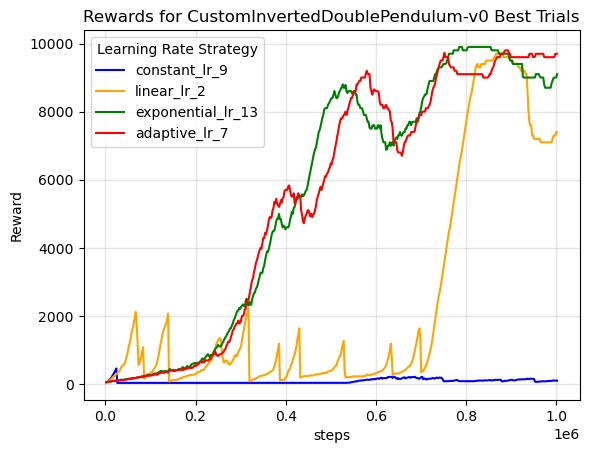

In [113]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/CustomInvertedDoublePendulum-v1"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_9", "linear_lr_2", "exponential_lr_13", "adaptive_lr_7"]

colours = {
    "constant_lr_9": "blue",
    "linear_lr_2": "orange",
    "exponential_lr_13": "green",
    "adaptive_lr_7": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for CustomInvertedDoublePendulum-v1 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

same as v0?? FIX

## CustomInvertedDoublePendulum-v2
Both poles lengths are randomly chosen between 0.3 and 0.8 with equal probability as training progresses

In [114]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_cidp_v2 = pkl.load(open("constant_lr_CustomInvertedDoublePendulum-v2.pkl", "rb"))
lin_cidp_v2 = pkl.load(open("linear_lr_CustomInvertedDoublePendulum-v2.pkl", "rb"))
exp_cidp_v2 = pkl.load(open("exponential_lr_CustomInvertedDoublePendulum-v2.pkl", "rb"))
adap_cidp_v2 = pkl.load(open("adaptive_lr_CustomInvertedDoublePendulum-v2.pkl", "rb"))

In [115]:
print("-----Constant LR-----")
print("Best Trial run:", cons_cidp_v2.best_trial.number)
print("Best Trial Hyperparameters:", cons_cidp_v2.best_trial.params)
print("Best Trial Value:", cons_cidp_v2.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_cidp_v2.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_cidp_v2.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_cidp_v2.best_trial.number)
print("Best Trial Hyperparameters:", lin_cidp_v2.best_trial.params)
print("Best Trial Value:", lin_cidp_v2.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_cidp_v2.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_cidp_v2.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_cidp_v2.best_trial.number)
print("Best Trial Hyperparameters:", exp_cidp_v2.best_trial.params)
print("Best Trial Value:", exp_cidp_v2.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_cidp_v2.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_cidp_v2.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_cidp_v2.best_trial.number)
print("Best Trial Hyperparameters:", adap_cidp_v2.best_trial.params)
print("Best Trial Value:", adap_cidp_v2.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_cidp_v2.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_cidp_v2.trials))

-----Constant LR-----
Best Trial run: 12
Best Trial Hyperparameters: {'learning_rate': 0.00016481865568214557}
Best Trial Value: [9530.470217418671]
Average Evaluated Reward After Training: 4542.05119284312

-----Linear Schedule LR-----
Best Trial run: 7
Best Trial Hyperparameters: {'initial_lr': 0.0002847977806770251, 'final_lr': 7.225687492540896e-06}
Best Trial Value: [9989.764398670197]
Average Evaluated Reward After Training: 4693.0963178666425

-----Exponential Schedule LR-----
Best Trial run: 3
Best Trial Hyperparameters: {'initial_lr': 5.9425329998521166e-05, 'final_lr': 7.406388743757035e-06, 'decay_rate': 0.18640170615248683}
Best Trial Value: [9976.769155693055]
Average Evaluated Reward After Training: 4405.076251157125

-----Adaptive (no threshold) LR-----
Best Trial run: 6
Best Trial Hyperparameters: {'initial_lr': 0.00011342540460787548, 'top_lr': 0.00023559756470055678, 'bottom_lr': 3.328375054848501e-05, 'adjustment_factor': 0.01706493930024223}
Best Trial Value: [9866.

In [116]:
fig1 = plot_optimization_history(cons_cidp_v2)
fig2 = plot_optimization_history(lin_cidp_v2)
fig3 = plot_optimization_history(exp_cidp_v2)
fig4 = plot_optimization_history(adap_cidp_v2)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [117]:
fig1 = plot_param_importances(cons_cidp_v2)
fig2 = plot_param_importances(lin_cidp_v2)
fig3 = plot_param_importances(exp_cidp_v2)
fig4 = plot_param_importances(adap_cidp_v2)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [128]:
fig1 = plot_parallel_coordinate(cons_cidp_v2)
fig2 = plot_parallel_coordinate(lin_cidp_v2)
fig3 = plot_parallel_coordinate(exp_cidp_v2)
fig4 = plot_parallel_coordinate(adap_cidp_v2)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

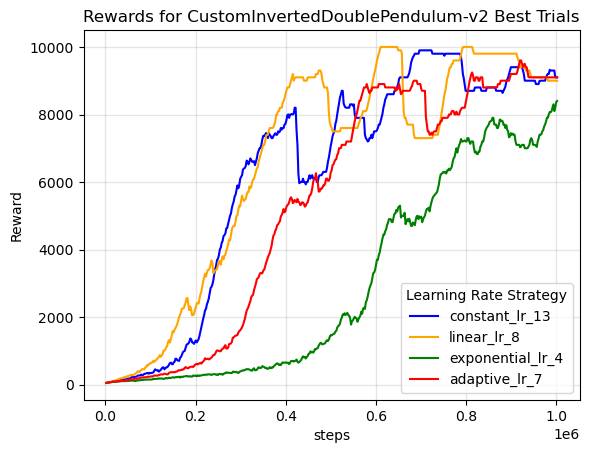

In [131]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/CustomInvertedDoublePendulum-v2"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_13", "linear_lr_8", "exponential_lr_4", "adaptive_lr_7"]

colours = {
    "constant_lr_13": "blue",
    "linear_lr_8": "orange",
    "exponential_lr_4": "green",
    "adaptive_lr_7": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for CustomInvertedDoublePendulum-v2 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

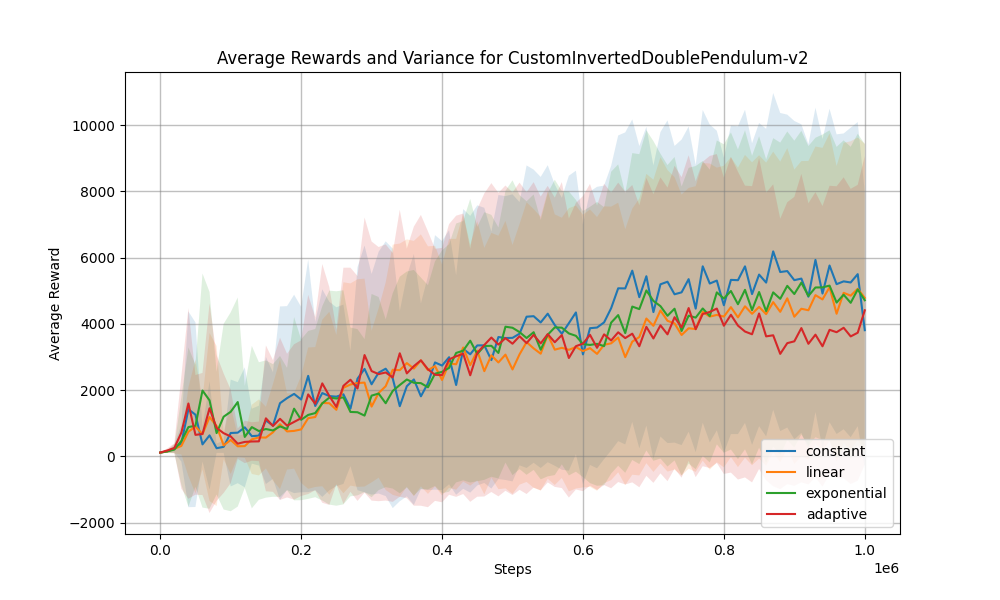

## BipedalWalker-v3

In [124]:
# Collect Optuna Studies and  relevent logfiles

# Studies
os.chdir("C:/Users/natha/Desktop/FYP-2024/saved_studies/") # set current directory

cons_bw_v3 = pkl.load(open("constant_lr_BipedalWalker-v3.pkl", "rb"))
lin_bw_v3 = pkl.load(open("linear_lr_BipedalWalker-v3.pkl", "rb"))
exp_bw_v3 = pkl.load(open("exponential_lr_BipedalWalker-v3.pkl", "rb"))
adap_bw_v3 = pkl.load(open("adaptive_lr_BipedalWalker-v3.pkl", "rb"))

In [126]:
print("-----Constant LR-----")
print("Best Trial run:", cons_bw_v3.best_trial.number)
print("Best Trial Hyperparameters:", cons_bw_v3.best_trial.params)
print("Best Trial Value:", cons_bw_v3.best_trial.values)

cons_evaluated_rewards = 0
for trial in cons_bw_v3.trials:
    cons_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", cons_evaluated_rewards/len(cons_bw_v3.trials))

print("\n-----Linear Schedule LR-----")
print("Best Trial run:", lin_bw_v3.best_trial.number)
print("Best Trial Hyperparameters:", lin_bw_v3.best_trial.params)
print("Best Trial Value:", lin_bw_v3.best_trial.values)

lin_evaluated_rewards = 0
for trial in lin_bw_v3.trials:
    lin_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", lin_evaluated_rewards/len(lin_bw_v3.trials))

print("\n-----Exponential Schedule LR-----")
print("Best Trial run:", exp_bw_v3.best_trial.number)
print("Best Trial Hyperparameters:", exp_bw_v3.best_trial.params)
print("Best Trial Value:", exp_bw_v3.best_trial.values)

exp_evaluated_rewards = 0
for trial in exp_bw_v3.trials:
    exp_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", exp_evaluated_rewards/len(exp_bw_v3.trials))

print("\n-----Adaptive (no threshold) LR-----")
print("Best Trial run:", adap_bw_v3.best_trial.number)
print("Best Trial Hyperparameters:", adap_bw_v3.best_trial.params)
print("Best Trial Value:", adap_bw_v3.best_trial.values)

adap_evaluated_rewards = 0
for trial in adap_bw_v3.trials:
    adap_evaluated_rewards += trial.value
print("Average Evaluated Reward After Training:", adap_evaluated_rewards/len(adap_bw_v3.trials))

-----Constant LR-----
Best Trial run: 1
Best Trial Hyperparameters: {'learning_rate': 0.00023386832422693345}
Best Trial Value: [234.21377848963894]
Average Evaluated Reward After Training: 150.77582836818362

-----Linear Schedule LR-----
Best Trial run: 1
Best Trial Hyperparameters: {'initial_lr': 0.0011188773887637101, 'final_lr': 9.807383359565505e-06}
Best Trial Value: [287.72137675409107]
Average Evaluated Reward After Training: 178.9076771197625

-----Exponential Schedule LR-----
Best Trial run: 3
Best Trial Hyperparameters: {'initial_lr': 5.9425329998521166e-05, 'final_lr': 7.406388743757035e-06, 'decay_rate': 0.18640170615248683}
Best Trial Value: [258.0743917758358]
Average Evaluated Reward After Training: 135.5318229104883

-----Adaptive (no threshold) LR-----
Best Trial run: 3
Best Trial Hyperparameters: {'initial_lr': 0.0008557618193958446, 'top_lr': 0.005437818931105102, 'bottom_lr': 0.00014457090810520869, 'adjustment_factor': 0.024085624975136354}
Best Trial Value: [269.

In [127]:
fig1 = plot_optimization_history(cons_bw_v3)
fig2 = plot_optimization_history(lin_bw_v3)
fig3 = plot_optimization_history(exp_bw_v3)
fig4 = plot_optimization_history(adap_bw_v3)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [129]:
fig1 = plot_param_importances(cons_bw_v3)
fig2 = plot_param_importances(lin_bw_v3)
fig3 = plot_param_importances(exp_bw_v3)
fig4 = plot_param_importances(adap_bw_v3)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [130]:
fig1 = plot_parallel_coordinate(cons_bw_v3)
fig2 = plot_parallel_coordinate(lin_bw_v3)
fig3 = plot_parallel_coordinate(exp_bw_v3)
fig4 = plot_parallel_coordinate(adap_bw_v3)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

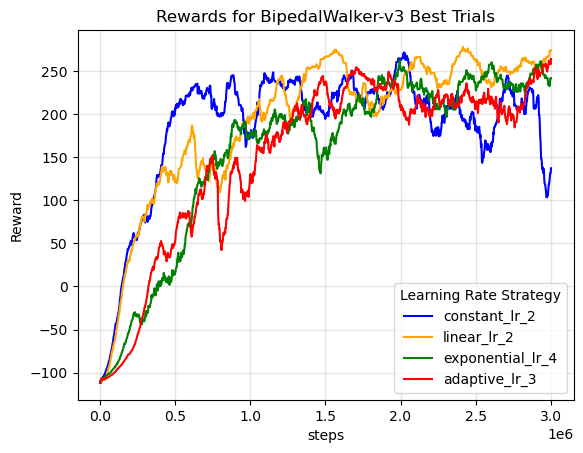

In [138]:
# logfiles, plotting best trials from each LR strategy

base_log_dir = "C:/Users/natha/Desktop/FYP-2024/logs/BipedalWalker-v3"

# Note: best constant: trial 0 = constant_lr_1, etc.
best_trials = ["constant_lr_2", "linear_lr_2", "exponential_lr_4", "adaptive_lr_3"]

colours = {
    "constant_lr_2": "blue",
    "linear_lr_2": "orange",
    "exponential_lr_4": "green",
    "adaptive_lr_3": "red"
}

trial_data = {}
for trial_name in best_trials:
    rewards_best_trial = read_rewards(trial_name)
    trial_data[trial_name] = rewards_best_trial 
    
all_trials_data = []
for trial_name, rewards in trial_data.items():
    trial_df = data_to_dataframe(rewards, trial_name)
    all_trials_data.append(trial_df)
   
for trial in all_trials_data:
    plt.plot(trial.loc[:,"step"], trial.loc[:,"reward"], label=trial['trial'].iloc[0], color = colours[trial['trial'].iloc[0]])

plt.title(f"Rewards for BipedalWalker-v3 Best Trials")
plt.xlabel("steps")
plt.ylabel("Reward")
plt.legend(title="Learning Rate Strategy")
plt.grid(visible = True, axis = "both", color="grey", linewidth = 1, alpha = 0.2)

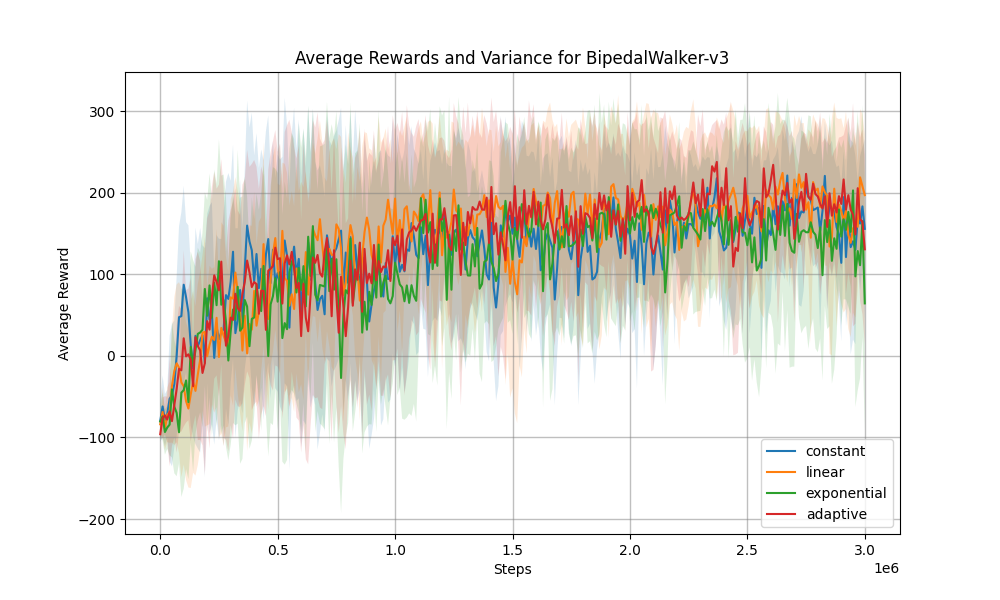